In [ ]:
import numpy as np
import math

# 교재 AI03 26페이지 예제 수식
def func(x):
    y = 0.5 * (math.cos(8*x) + math.sin(4*x) - x + 0.8)
    return y

X_train = []
y_train = []

# 0.1에서 0.9까지 17개 훈련 데이터 생성
for i in range(17):
    x = 0.1 + i*0.05
    x = round(x, 2)
    y = func(x)
    X_train.append(x)
    y_train.append(y)
    
print(X_train)
print(y_train)

# 0.1에서 0.9까지 81개 테스트 데이터 생성 (확인용)
X_test = []
for i in range(81):
    x = 0.1 + i*0.01
    x = round(x, 2)
    X_test.append(x)
    
print(X_test)

[0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9]
[0.8930625258279079, 0.7885001139358545, 0.644078284299117, 0.4876620741303771, 0.3473226852129905, 0.24661369465990107, 0.200639413623376, 0.2135446072720241, 0.2778269029810349, 0.37558176692058537, 0.4814810819952987, 0.5670090215609207, 0.6052770143330775, 0.5756451473551166, 0.46740538766530626, 0.28192819416149706, 0.03291543561870103]
[0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9]


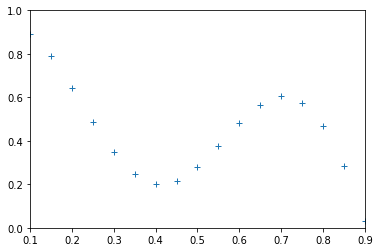

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 훈련 데이터 분포
plt.plot(X_train, y_train, '+')
plt.xlim([0.1, 0.9])
plt.ylim([0, 1.])
plt.show()

In [ ]:
import tensorflow as tf 
from tensorflow.keras import Sequential  # 모듈(변수나 함수를 포함)만 불러오기
from tensorflow.keras.initializers import RandomUniform # initialize
from tensorflow.keras.layers import Dense # 이전노드와 모두 연결시키는 방법. 밀도높은 layer 만들겠다는 뜻

# -0.5에서 +0.5 사이로 초기화
initializer = RandomUniform(minval=-0.5, maxval=0.5)

# 모델 구조 정의하기
model = Sequential()  # 순차적 계층화 준비 (MLP, Deep neural network)
model.add(Dense(6, input_dim=1, activation='sigmoid', kernel_initializer=initializer))  # 은닉층 1개,dense(은닉노드 6개,입력값1차원,범위 그대로사용하겠다.)
model.add(Dense(1, activation='linear', kernel_initializer=initializer))   
# regression 문제는 output에서, activation으로 선형함수(linear)사용 > y값의 범위를 0,1로 고정시키면 안되기 때문에.

# 모델 구축하기
model.compile(loss='mean_squared_error', optimizer='adam') 
# regression 문제는 loss(cost) function으로 대부분 평균제곱오차(MSE) 사용
# adam = 0.001

In [ ]:
# 데이터 훈련하기
hist = model.fit(X_train, y_train, epochs=10000, verbose=1)
# training data 입력, epochs는 반복횟수를 의미, 

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
1/1 [==============================] - 0s 8ms/step - loss: 0.0241
Epoch 7502/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0241
Epoch 7503/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0241
Epoch 7504/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0241
Epoch 7505/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0241
Epoch 7506/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0241
Epoch 7507/10000
1/1 [==============================] - 0s 11ms/step - loss: 0.0240
Epoch 7508/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0240
Epoch 7509/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0240
Epoch 7510/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0240
Epoch 7511/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0240
Epoch 7512/10000
1/1 [==============================] - 0s 8ms/ste

In [ ]:
y_pred = [] # 예측값 비워놓기 
y_pred = model.predict(X_test) # test data는 81개 
# print(y_pred)
print(list(y_pred[:,0]))

[0.029525174, 0.02958208, 0.029638976, 0.029695867, 0.029752754, 0.02980963, 0.029866494, 0.029923355, 0.029980205, 0.030037044, 0.030093873, 0.030150691, 0.030207502, 0.030264296, 0.030321082, 0.030377854, 0.03043461, 0.030491358, 0.030548088, 0.030604808, 0.030661508, 0.030718198, 0.030774869, 0.030831527, 0.03088817, 0.030944787, 0.031001395, 0.031057984, 0.031114552, 0.031171104, 0.031227635, 0.031284146, 0.03134064, 0.03139711, 0.031453565, 0.031509995, 0.031566408, 0.031622786, 0.031679153, 0.031735495, 0.031791814, 0.031848107, 0.031904377, 0.03196062, 0.032016844, 0.032073036, 0.032129206, 0.032185346, 0.03224146, 0.032297544, 0.03235361, 0.032409646, 0.032465644, 0.03252162, 0.032577563, 0.032633483, 0.03268937, 0.032745227, 0.032801047, 0.032856844, 0.032912605, 0.03296833, 0.033024028, 0.033079695, 0.033135325, 0.03319092, 0.033246484, 0.03330201, 0.03335751, 0.033412967, 0.033468384, 0.033523772, 0.03357912, 0.033634435, 0.03368971, 0.03374495, 0.033800147, 0.033855308, 0.0

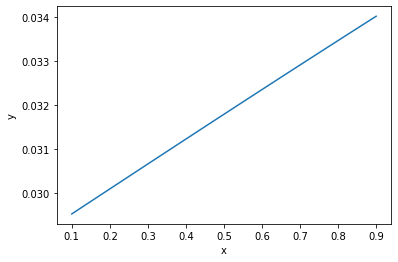

In [ ]:
import matplotlib.pyplot as plt

plt.plot(X_test, y_pred)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [ ]:
model.get_weights()

[array([[ 0.29666102, -0.28863525,  0.24688715, -0.4955989 ,  0.32623777,
          0.08616941]], dtype=float32),
 array([ 0.01005479, -0.00955841, -0.00979754, -0.00984097, -0.00972794,
         0.01003118], dtype=float32),
 array([[ 0.04086178],
        [-0.00511509],
        [-0.01780595],
        [-0.02526312],
        [-0.01157827],
        [ 0.05609643]], dtype=float32),
 array([0.00996843], dtype=float32)]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________
